# Statistical learning

Machine learning is a technique with a growing importance, as the size of the datasets experimental sciences are facing is rapidly growing. Problems it tackles range from **building a prediction function** linking different observations, to **classifying observations**, or **learning the structure in an unlabeled dataset**.

This tutorial will explore *statistical learning*, the use of machine learning techniques with the *goal of statistical inference*: drawing conclusions on the data at hand.

Scikit-learn is a Python module integrating classic machine learning algorithms in the tightly-knit world of scientific Python packages (NumPy, SciPy, matplotlib).

## Statistical learning: the setting and the estimator object in scikit-learn

### Datasets
Scikit deals with data that is represented in 2D arrays. They can be understood as a list of multi-dimensional observations. 

The first axis is a sample axis, the second the features axis.

In [1]:
from sklearn import datasets
iris = datasets.load_iris()
data = iris.data
data.shape

(150, 4)

In [2]:
iris.DESCR

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n:Number of Instances: 150 (50 in each of three classes)\n:Number of Attributes: 4 numeric, predictive attributes and the class\n:Attribute Information:\n    - sepal length in cm\n    - sepal width in cm\n    - petal length in cm\n    - petal width in cm\n    - class:\n            - Iris-Setosa\n            - Iris-Versicolour\n            - Iris-Virginica\n\n:Summary Statistics:\n\n============== ==== ==== ======= ===== ====================\n                Min  Max   Mean    SD   Class Correlation\n============== ==== ==== ======= ===== ====================\nsepal length:   4.3  7.9   5.84   0.83    0.7826\nsepal width:    2.0  4.4   3.05   0.43   -0.4194\npetal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\npetal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n============== ==== ==== ======= ===== ====================\n\n:Missing Attribute Values: None\n:Class Distribution: 

son 150 observaciones of irises, each described by 4 features: sepal len, sepal width, petal length and petal width. There are 3 classes, 50 in each class.

#### Reshaping


In [3]:
digits = datasets.load_digits()
digits.images.shape

(1797, 8, 8)

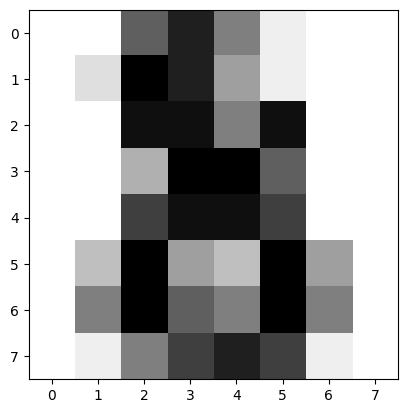

In [5]:
import matplotlib.pyplot as plt
plt.imshow(digits.images[-1], cmap=plt.cm.gray_r)

To use this dataset with scikit-learn, we transform each 8x8 image into a feature vector of length 64

In [9]:
data = digits.images.reshape((digits.images.shape[0], -1))
data.shape

(1797, 64)

### Estimator objects
Fitting data: the main API implemented by scikit-learn is that of the estimator. An estimator is any object that learns from data; it may be a classification, regression or clustering algorithm or a transformer that extracts/filters useful features from raw data.

All estimator objects expose a fit method that takes a dataset (usually a 2-d array):

>>> estimator.fit(data)

Estimator parameters: All the parameters of an estimator can be set when it is instantiated or by modifying the corresponding attribute:

>>> estimator = Estimator(param1=1, param2=2)
>>> estimator.param1

1
Estimated parameters: When data is fitted with an estimator, parameters are estimated from the data at hand. All the estimated parameters are attributes of the estimator object ending by an underscore:

>>> estimator.estimated_param_

## Aprendizaje supervisado: predecir una variable de observaciones de alta dimensión

El aprendizaje supervisado consiste en ligar dos datasets: una matriz de observaciones X y una variable externa y, que se busca predecir. 

La clasificación asigna observaciones en un conjunto de etiquetas finitas.

Regresión asigna un target continuo (numérico)

### Nearest neighbor

Clasifica 3 tipos de irises (Setosa, Versicolour and Virginica) del tamaño (largo y ancho) de pétalo y sepal como características

In [10]:
import numpy as np
iris_X, iris_y = datasets.load_iris(return_X_y=True)
np.unique(iris_y) # Encuentra los elementos únicos de un arreglo y los devuelve en un arreglo ordenado.


array([0, 1, 2])

#### Clasificador k-Nearest neighbors


##### Training and test set

In [15]:
np.random.seed(0) # Genera seed
indices = np.random.permutation(len(iris_X)) # Permuta los elementos
# División del dataset y las etiquetas correspondientes
# Se toman todos los elementos excepto los últimos 10 para entrenamiento.
iris_X_train = iris_X[indices[:-10]]
iris_y_train = iris_y[indices[:-10]]
iris_X_test = iris_X[indices[-10:]]
iris_y_test = iris_y[indices[-10:]]


In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(iris_X_train, iris_y_train)


KNeighborsClassifier()

In [21]:
predict = knn.predict(iris_X_test) #Resultados de la predicción



In [22]:
print (predict)

[1 2 1 0 0 0 2 1 2 0]


In [19]:
iris_y_test # Resultados reales

array([1, 1, 1, 0, 0, 0, 2, 1, 2, 0])